In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_csv('random_timetable.csv', sep=';', encoding='cp1251')
df.head()

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес
0,101,пн,1,Мат Анализ,Иванов,Лекция,Васильевский остров
1,101,пн,2,Английский,Шептунов,Практика,Васильевский остров
2,101,пн,3,ОП,Рахимов,Лекция,Васильевский остров
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф


# Информация преподавателя о себе

In [3]:
teacherName = input()

Заболотный


In [4]:
# Преподаватель может посмотреть список всех своих пар на неделе
df[df['Преподаватель'] == teacherName].head(10)

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф
5,101,вт,3,Алгебра,Заболотный,Практика,Петергоф
11,101,чт,3,Алгебра,Заболотный,Лекция,Петергоф
19,102,пн,2,Алгебра,Заболотный,Лекция,Петергоф
21,102,вт,2,Алгебра,Заболотный,Практика,Васильевский остров
35,102,сб,3,Алгебра,Заболотный,Лекция,Петергоф
43,103,ср,1,Алгебра,Заболотный,Лекция,Васильевский остров
48,103,пт,2,Алгебра,Заболотный,Лекция,Петергоф
53,103,сб,4,Алгебра,Заболотный,Практика,Петергоф
112,107,вт,1,Алгебра,Заболотный,Лекция,Петергоф


In [5]:
# Посмотреть количество пар в неделю для отдельного преподавателя
df[df['Преподаватель'] == teacherName]['День'].count()

18

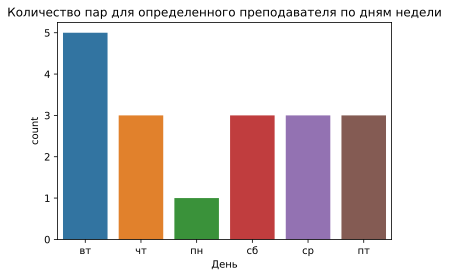

In [6]:
sns.countplot(df[df['Преподаватель'] == teacherName]['День']);
plt.title('Количество пар для определенного преподавателя по дням недели');

# Перенос занятия


In [7]:
# Преподаватель вводит день и номер пары, которую хочет перенести
teacherName = input()
day = input()
number = int(input())

Егоров
пн
2


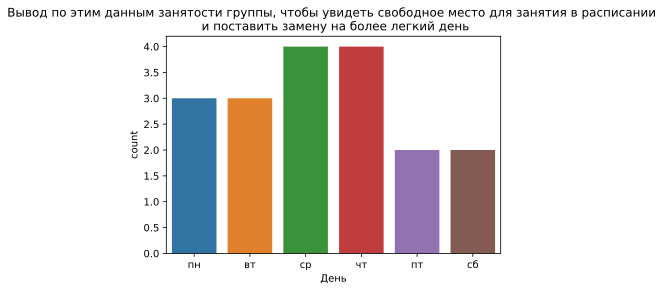

In [8]:
group = df[(df['День'] == day) & (df['Номер пары'] == number) & (df['Преподаватель'] == teacherName)]['Номер группы'].item()
sns.countplot(df[df['Номер группы'] == group]['День']);
plt.title('Вывод по этим данным занятости группы, чтобы увидеть свободное место для занятия в расписании \n и поставить замену на более легкий день');

In [9]:
# При желании не перенести пару, а заменить себя другим преподавателем, пользователь может получить список свободных 
# преподавателей в это время
pd.unique(df[~(df['День'] == day) | ~(df['Номер пары'] == number)]['Преподаватель'])

array(['Иванов', 'Рахимов', 'Заболотный', 'Сорокин', 'Исаев', 'Петров',
       'Шептунов', 'Авдеев', 'Мракова', 'Купетов', 'Васильева', 'Егоров'],
      dtype=object)

# Общая информация

Text(0.5,1,'Общая относительная занятость препод')

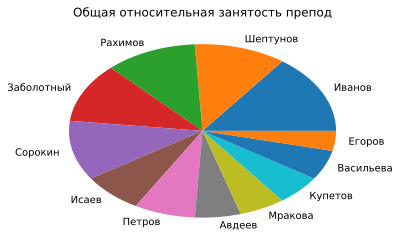

In [10]:
count = df['Преподаватель'].value_counts()
names = pd.unique(df['Преподаватель'])
counts= [0]*len(count)
for i in range(len(count)):
    counts[i]=count[i]
fig = plt.figure()
plt.pie(counts, labels=names)
plt.title('Общая относительная занятость препод')